In [2]:
from square.client import Client
import os
import pandas as pd

from google_sheets import *

# import pandas as pd
from boto import get_square_secret

# import os
import pickle
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [72]:

stopwords = set(list(STOPWORDS) + [x.replace("'","") for x in STOPWORDS])

In [73]:
df=pd.read_excel('OTPI V1.xlsx', sheet_name='OTPI Scores')

In [74]:
df=df[df['Comments'].notnull()]
df['Comments']=df['Comments'].str.lower()
df['Comments']=df['Comments'].str.replace('.', '')
df['Comments']=df['Comments'].str.replace(',', '')
df['Team Report']=df['Team Report'].str.lower()
df['Team Report']=df['Team Report'].str.replace('.', '')
df['Team Report']=df['Team Report'].str.replace(',', '')

In [110]:
team_reports=df[df['Team Report'].notnull()]['Team Report'].drop_duplicates()
comments =df[df['Comments'].notnull()]['Comments'].drop_duplicates()
conc=pd.concat([team_reports, comments])
conc_str = ' '.join(conc)
words = conc_str.split(' ')
dedupe_words = list(set(words))
dedupe_words=[x for x in dedupe_words if x!='']
counts = [[x, len([y for y in words if y == x])] for x in dedupe_words]
words_to_use=pd.DataFrame(counts, columns = ['word', 'count']).sort_values('count', ascending=False).tail(-70)
# words_to_use=words_to_use[~words_to_use['word'].isin(['game', 'time', 'goal', 'score', 'scored', 'team', 'player'])]
words_to_use[words_to_use['word']=='shape']



,word,count
4875,shape,31


In [112]:
df_team=df[df['OT Team']==1]
df_team=df_team[df_team['Competition']!='Friendly']
team_reports=df_team[df_team['Team Report'].notnull()]['Team Report'].drop_duplicates()

In [113]:
comments =df_team[df_team['Comments'].notnull()]['Comments'].drop_duplicates()

In [114]:
conc=pd.concat([team_reports, comments])
conc

350     fast paced game from the start with both teams...
432     very good performance controlled the game  pos...
515     big away win vs last years champions they have...
597     another solid win not as free flowing as in pr...
678     opening 20 mins was very scrappy from both tea...
                              ...                        
2103    so so game  moments in build up but couldn't c...
2104    looked rusty first 20 mins grew into game and ...
2105    unfortunate to have lost starting spot with th...
2106    i needed him to take / set up training session...
2107    did ok for the breif time he was on  had chanc...
Length: 326, dtype: object

In [115]:
cloudwords = ' '.join([x for x in ' '.join(conc).split(' ') if x in list(words_to_use['word'])])

In [122]:
words = cloudwords.split(' ')
dedupe_words = list(set(words))
dedupe_words=[x for x in dedupe_words if x!='']
counts = [[x, len([y for y in words if y == x])] for x in dedupe_words]
df_mid=pd.DataFrame(counts, columns = ['word', 'count']).sort_values('count', ascending=False).reset_index()
df_mid[df_mid['word'].str.contains('display')]

,index,word,count
197,1569,display,16
2333,334,displays,1
2677,1002,displaying,1


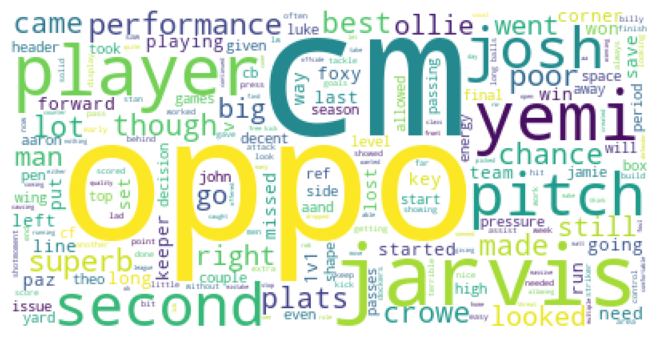

In [117]:
wordcloud = WordCloud(background_color ='white',
                stopwords = stopwords).generate(cloudwords)

# Display the generated image:
plt.figure(facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [120]:
[x for x in list(STOPWORDS) + [x.replace("'","") for x in STOPWORDS] if x=='shape']

[]